In [6]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist, fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import keras
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoded = Dense(64,activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])


In [8]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() #loading the train and test data

#normalizing the data 
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#reshaping the data
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [17]:
#calling the autoencoder
# history before adding any additional layers 
history = autoencoder.fit(x_train, x_train, epochs=5, batch_size=256, shuffle=True, validation_data=(x_test, x_test))


Epoch 1/5
235/235 [==============================] - 2s 5ms/step - loss: 0.7205 - accuracy: 0.0013 - val_loss: 0.7163 - val_accuracy: 0.0020
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.7149 - accuracy: 0.0014 - val_loss: 0.7108 - val_accuracy: 0.0020
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.7094 - accuracy: 0.0011 - val_loss: 0.7054 - val_accuracy: 0.0020
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.7040 - accuracy: 0.0014 - val_loss: 0.7002 - val_accuracy: 0.0020
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6989 - accuracy: 0.0014 - val_loss: 0.6951 - val_accuracy: 0.0020


In [9]:
# history after addining more layers 
history2 = autoencoder.fit(x_train, x_train, epochs=5, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/5
235/235 [==============================] - 2s 5ms/step - loss: 0.7134 - accuracy: 7.7429e-04 - val_loss: 0.7094 - val_accuracy: 5.0000e-04
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.7080 - accuracy: 7.1334e-04 - val_loss: 0.7041 - val_accuracy: 5.0000e-04
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.7027 - accuracy: 6.3765e-04 - val_loss: 0.6990 - val_accuracy: 5.0000e-04
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6977 - accuracy: 5.4131e-04 - val_loss: 0.6940 - val_accuracy: 5.0000e-04
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6927 - accuracy: 4.7856e-04 - val_loss: 0.6891 - val_accuracy: 5.0000e-04


In [5]:
n = 5 

encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape=(encoding_dim))
last_layer = autoencoder.layers[-1]
decoder_model = keras.Model(encoded_input,last_layer(encoded_input))

images_encoded = encoder.predict(x_test)
images_decoded = decoder_model(images_encoded)

plt.figure(figsize=(20, 5)) # determing the size of the output pictures

# looping through the first 5 images and using subplot of for construction and reconstruction. 
for i in range(5):
  # the originial images are displayed 
  axis = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28,28)) # reshaping size 28 X 28 
  plt.gray()
  axis.get_xaxis().set_visible(False)
  axis.get_yaxis().set_visible(False)

  # showing the images reconstructed 
  axis = plt.subplot(2, n,  i + n + 1)
  plt.imshow(pred_decoded[i].reshape(28,28)) # reshaping size 28 X 28
  plt.gray()
  axis.get_xaxis().set_visible(False)
  axis.get_yaxis().set_visible(False)

X = (x_test[1].reshape(28,28)) # reshaping the test data before it can be passed 

plt.imshow(X) # looking at the results


ValueError: ignored

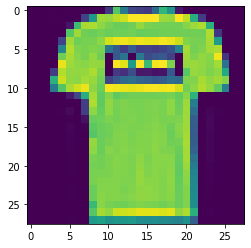

In [10]:
# visualing the train data
plt.imshow(x_train[1].reshape(28,28))
x = x_train[1].reshape(28,28)
plt.show()

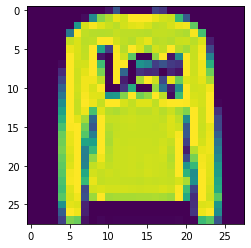

In [11]:
# visualizg the prediction
pred = x_test[1].reshape(28,28) 
plt.imshow(pred)
plt.show()


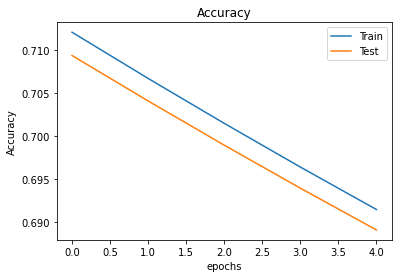

In [12]:

plt.figure()
plt.plot(history2.history['loss'], label='Train')
plt.plot(history2.history['val_loss'], label='Test')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

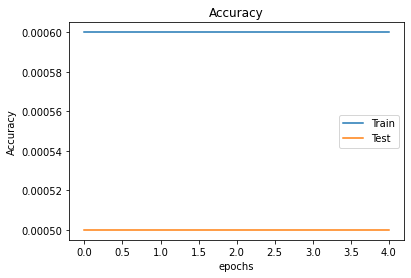

In [13]:
plt.figure()
plt.plot(history2.history['accuracy'], label='Train')
plt.plot(history2.history['val_accuracy'], label='Test')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

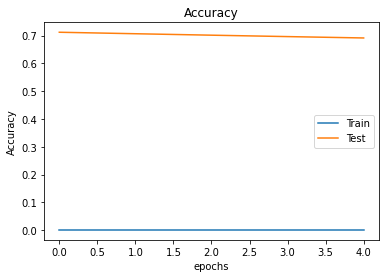

In [14]:
plt.figure()
plt.plot(history2.history['accuracy'], label='Train')
plt.plot(history2.history['loss'], label='Test')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

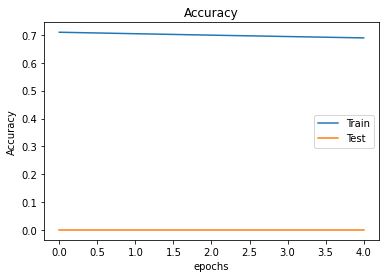

In [15]:
plt.figure()
plt.plot(history2.history['val_loss'], label='Train')
plt.plot(history2.history['val_accuracy'], label='Test')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()